## This dataset is conerned before the begin of the NBA 2018-2019 season. It includes players' fundamental info and their performance data in last season and their career. In this project, I will first do some EDA to find out some interested statistic. Then, I will use Kmeans model to verify if feature "height" and "weight" can accurately predict players' position.

-Source- : https://www.kaggle.com/edgarhuichen/espn-nba-players-data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Load data

In [2]:
nba = pd.read_csv('NBA_Players.csv')
nba

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,http://www.espn.com/nba/player/_/id/3064308,SG,24,198.12,89.59,California,"1,349,464",...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,http://www.espn.com/nba/player/_/id/3917376,F,21,200.66,99.55,California,"5,169,960",...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0
5,Boston Celtics,Marcus Georges-Hunt,2,http://www.espn.com/nba/player/_/id/2982261,SG,24,195.58,102.26,Georgia Tech,Not signed,...,0.418,0.1-0.4,0.294,0.5-0.7,0.710,0.2,0.0,0.1,0.1,1.6
6,Boston Celtics,Gordon Hayward,8,http://www.espn.com/nba/player/_/id/4249,SF,28,203.20,101.81,Butler,"31,214,295",...,0.444,1.3-3.6,0.368,3.8-4.6,0.820,3.4,0.4,1.0,2.0,15.6
7,Boston Celtics,Al Horford,11,http://www.espn.com/nba/player/_/id/3213,PF,32,208.28,110.86,Florida,"28,928,709",...,0.525,0.4-1.1,0.370,1.8-2.4,0.750,3.2,1.2,0.8,1.6,14.2
8,Boston Celtics,Kyrie Irving,7,http://www.espn.com/nba/player/_/id/6442,PG,26,190.50,87.33,Duke,"20,099,189",...,0.462,2.0-5.2,0.388,3.9-4.5,0.875,5.5,0.3,1.3,2.7,22.0
9,Boston Celtics,Nick King,0,http://www.espn.com/nba/player/_/id/3057182,F,23,200.66,101.81,Middle Tennessee,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0


In [3]:
nba.columns

Index(['TEAM', ' NAME', ' EXPERIENCE', ' URL', ' POSITION', ' AGE', ' HT',
       ' WT', ' COLLEGE', ' SALARY', ' PPG_LAST_SEASON', ' APG_LAST_SEASON',
       ' RPG_LAST_SEASON', ' PER_LAST_SEASON', ' PPG_CAREER', ' APG_CAREER',
       ' RGP_CAREER', ' GP', ' MPG', ' FGM_FGA', ' FGP', ' THM_THA', ' THP',
       ' FTM_FTA', ' FTP', ' APG', ' BLKPG', ' STLPG', ' TOPG', ' PPG'],
      dtype='object')

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
TEAM                550 non-null object
 NAME               550 non-null object
 EXPERIENCE         550 non-null int64
 URL                550 non-null object
 POSITION           550 non-null object
 AGE                550 non-null object
 HT                 550 non-null float64
 WT                 550 non-null float64
 COLLEGE            550 non-null object
 SALARY             550 non-null object
 PPG_LAST_SEASON    538 non-null float64
 APG_LAST_SEASON    538 non-null float64
 RPG_LAST_SEASON    538 non-null float64
 PER_LAST_SEASON    538 non-null float64
 PPG_CAREER         550 non-null float64
 APG_CAREER         550 non-null float64
 RGP_CAREER         550 non-null float64
 GP                 550 non-null int64
 MPG                550 non-null float64
 FGM_FGA            550 non-null object
 FGP                550 non-null float64
 THM_THA            550 non-null object
 THP  

In [5]:
# Delete the space front of columns 
nba.columns = nba.columns.str.replace(' ', '')

In [6]:
# Drop URL columns because it is useless
nba1 = nba.drop(columns=['URL']).dropna(how='any')
nba1

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,Washington State,"5,193,600",6.0,...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,G,22,195.58,99.55,Virginia Tech,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,California,"1,349,464",3.0,...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,F,21,200.66,99.55,California,"5,169,960",14.5,...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,PG,21,198.12,92.76,South Carolina,Not signed,1.0,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0
5,Boston Celtics,Marcus Georges-Hunt,2,SG,24,195.58,102.26,Georgia Tech,Not signed,1.4,...,0.418,0.1-0.4,0.294,0.5-0.7,0.710,0.2,0.0,0.1,0.1,1.6
6,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,Butler,"31,214,295",2.0,...,0.444,1.3-3.6,0.368,3.8-4.6,0.820,3.4,0.4,1.0,2.0,15.6
7,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,Florida,"28,928,709",12.9,...,0.525,0.4-1.1,0.370,1.8-2.4,0.750,3.2,1.2,0.8,1.6,14.2
8,Boston Celtics,Kyrie Irving,7,PG,26,190.50,87.33,Duke,"20,099,189",24.4,...,0.462,2.0-5.2,0.388,3.9-4.5,0.875,5.5,0.3,1.3,2.7,22.0
9,Boston Celtics,Nick King,0,F,23,200.66,101.81,Middle Tennessee,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0


## 1. Salary analysis.

In [7]:
nba1[nba1['SALARY'].str.contains('Not signed')]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
1,Boston Celtics,Justin Bibbs,0,G,22,195.58,99.55,Virginia Tech,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
4,Boston Celtics,PJ Dozier,1,PG,21,198.12,92.76,South Carolina,Not signed,1.0,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0
5,Boston Celtics,Marcus Georges-Hunt,2,SG,24,195.58,102.26,Georgia Tech,Not signed,1.4,...,0.418,0.1-0.4,0.294,0.5-0.7,0.710,0.2,0.0,0.1,0.1,1.6
9,Boston Celtics,Nick King,0,F,23,200.66,101.81,Middle Tennessee,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
10,Boston Celtics,Walt Lemon Jr.,1,PG,26,190.50,81.45,Bradley,Not signed,3.4,...,0.438,0.2-0.2,1.000,0.4-0.6,0.667,1.0,0.2,0.0,0.8,3.4
18,Boston Celtics,Robert Williams,0,C,20,208.28,108.60,Texas A&M,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
23,Brooklyn Nets,Mitchell Creek,0,SF,26,195.58,100.90,-,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
33,Brooklyn Nets,Tahjere McCall,0,SG,24,195.58,85.97,Tennessee State,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
36,Brooklyn Nets,Nuni Omot,0,SF,24,205.74,97.29,Baylor,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
37,Brooklyn Nets,Theo Pinson,0,SG,22,198.12,98.64,North Carolina,Not signed,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0


### In the dataset, there are 102 players are not signed yet. In other words, they didn't make money.

In [8]:
nba2 = nba1.drop(nba1[nba1['SALARY'].str.contains('Not signed')].index)
nba2

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,Washington State,"5,193,600",6.0,...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
2,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,California,"1,349,464",3.0,...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,F,21,200.66,99.55,California,"5,169,960",14.5,...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
6,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,Butler,"31,214,295",2.0,...,0.444,1.3-3.6,0.368,3.8-4.6,0.820,3.4,0.4,1.0,2.0,15.6
7,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,Florida,"28,928,709",12.9,...,0.525,0.4-1.1,0.370,1.8-2.4,0.750,3.2,1.2,0.8,1.6,14.2
8,Boston Celtics,Kyrie Irving,7,PG,26,190.50,87.33,Duke,"20,099,189",24.4,...,0.462,2.0-5.2,0.388,3.9-4.5,0.875,5.5,0.3,1.3,2.7,22.0
11,Boston Celtics,Marcus Morris,7,PF,29,205.74,106.33,Kansas,"5,375,000",13.6,...,0.428,1.3-3.6,0.357,1.6-2.1,0.731,1.5,0.2,0.7,1.2,11.2
12,Boston Celtics,Semi Ojeleye,1,PF,23,200.66,109.05,SMU,"1,378,242",2.7,...,0.346,0.5-1.7,0.320,0.3-0.6,0.610,0.3,0.1,0.3,0.3,2.7
13,Boston Celtics,Terry Rozier,3,PG,24,185.42,85.97,Louisville,"3,050,390",11.3,...,0.377,1.1-3.2,0.355,0.9-1.2,0.773,2.1,0.2,0.7,0.8,7.2
14,Boston Celtics,Marcus Smart,4,PG,24,193.04,99.55,Oklahoma State,"11,660,716",10.2,...,0.360,1.2-4.2,0.293,2.0-2.6,0.756,3.9,0.4,1.5,1.8,9.4


### There are 436 players earn salary in this season.

In [9]:
# convert SALARY datatype from object to integer
def object_to_int(val):
    new_val = val.replace(',','')
    return int(new_val)
nba2['SALARY'].apply(object_to_int).mean()

7806378.394495413

In [10]:
nba2['SALARY'] = nba2['SALARY'].apply(object_to_int)

In [11]:
nba2['SALARY'].max()

37457154

In [12]:
nba2[nba2['SALARY']==37457154]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
103,Golden State Warriors,Stephen Curry,9,PG,30,190.5,85.97,Davidson,37457154,26.4,...,0.477,3.4-7.8,0.436,3.6-4.0,0.903,6.8,0.2,1.8,3.2,23.1


In [13]:
nba2['SALARY'].min()

838464

In [14]:
nba2[nba2['SALARY']==838464]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
17,Boston Celtics,Brad Wanamaker,0,PG,29,193.04,95.02,Pittsburgh,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
223,Detroit Pistons,Bruce Brown,0,SG,22,195.58,91.40,Miami (FL),838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
241,Detroit Pistons,Khyri Thomas,0,SG,22,190.50,95.02,Creighton,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
247,Indiana Pacers,Alize Johnson,0,PF,22,205.74,95.93,Missouri State,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
280,Dallas Mavericks,Ryan Broekhoff,0,SG,28,200.66,97.29,-,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
293,Dallas Mavericks,Ray Spalding,0,PF,21,208.28,97.29,Louisville,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
318,Memphis Grizzlies,Jevon Carter,0,PG,23,187.96,88.69,West Virginia,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
475,Denver Nuggets,Jarred Vanderbilt,0,PF,19,205.74,96.83,Kentucky,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
477,Minnesota Timberwolves,Keita Bates-Diop,0,SF,22,205.74,103.62,Ohio State,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
499,Oklahoma City Thunder,Hamidou Diallo,0,SG,20,195.58,89.59,Kentucky,838464,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### The average salary of NBA player is approximately 7.8 millon dollars.
### "Stephen Curry" earns the highest salary 37,457,154 dollars over the league.
### Several Players earn the lowest salary, which is the minimum guaranteed salary 838,464 dollars.
## 2.Which university do players mostly graduated from in national?

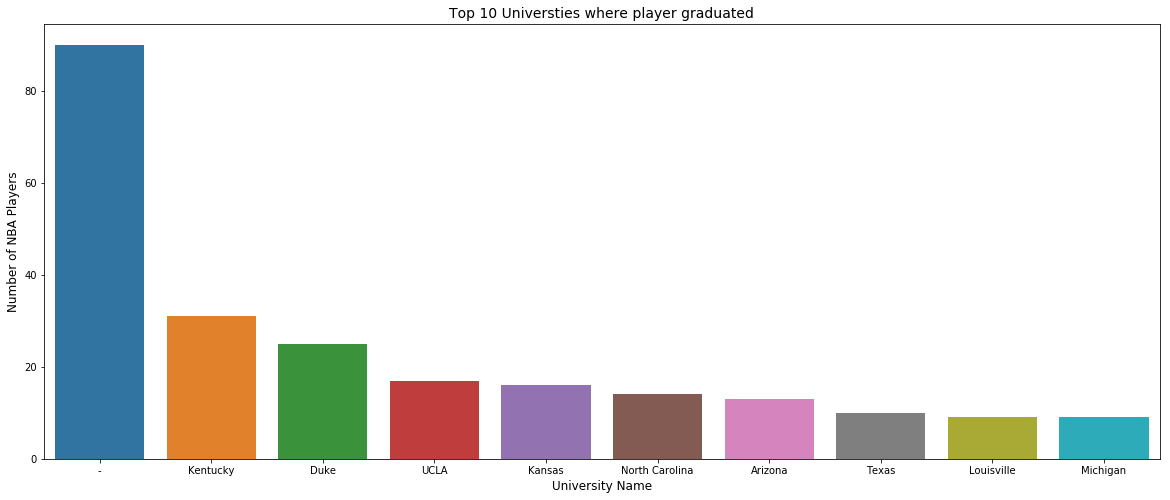

In [15]:
fig, ax = plt.subplots(figsize=(20,8))

count = nba['COLLEGE'].value_counts().iloc[:10].index.tolist()
ax = sns.countplot(x='COLLEGE', data=nba, order=count);

plt.title('Top 10 Universties where player graduated', fontsize=14)
plt.xlabel('University Name', fontsize=12)
plt.ylabel('Number of NBA Players', fontsize=12)
plt.show()

### Top 5 university which NBA players are graduated in national : Kentucky, Duke , UCLA, Kansas, North Carolina
## 3. Player position analysis

In [16]:
# List player who play in 'PG' role.
nba2[(nba2['POSITION']== 'PG')]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
8,Boston Celtics,Kyrie Irving,7,PG,26,190.50,87.33,Duke,20099189,24.4,...,0.462,2.0-5.2,0.388,3.9-4.5,0.875,5.5,0.3,1.3,2.7,22.0
13,Boston Celtics,Terry Rozier,3,PG,24,185.42,85.97,Louisville,3050390,11.3,...,0.377,1.1-3.2,0.355,0.9-1.2,0.773,2.1,0.2,0.7,0.8,7.2
14,Boston Celtics,Marcus Smart,4,PG,24,193.04,99.55,Oklahoma State,11660716,10.2,...,0.360,1.2-4.2,0.293,2.0-2.6,0.756,3.9,0.4,1.5,1.8,9.4
17,Boston Celtics,Brad Wanamaker,0,PG,29,193.04,95.02,Pittsburgh,838464,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
25,Brooklyn Nets,Spencer Dinwiddie,4,PG,25,198.12,95.02,Colorado,1656092,12.6,...,0.387,1.0-3.3,0.315,2.1-2.7,0.798,4.5,0.3,0.7,1.3,8.9
35,Brooklyn Nets,Shabazz Napier,4,PG,27,185.42,81.45,Connecticut,1942422,8.7,...,0.395,0.8-2.3,0.363,1.0-1.2,0.802,1.9,0.1,0.8,1.1,5.7
38,Brooklyn Nets,D'Angelo Russell,3,PG,22,195.58,89.59,Ohio State,7019698,15.5,...,0.409,1.9-5.4,0.344,2.0-2.7,0.754,4.3,0.2,1.1,2.7,14.6
43,New York Knicks,Trey Burke,5,PG,25,185.42,79.19,Michigan,1795015,12.8,...,0.404,1.3-3.8,0.339,1.1-1.4,0.791,3.8,0.1,0.6,1.4,10.9
55,New York Knicks,Emmanuel Mudiay,3,PG,22,195.58,90.50,-,4294480,8.6,...,0.374,0.9-3.0,0.317,2.0-2.7,0.731,4.3,0.3,0.8,2.4,10.8
56,New York Knicks,Frank Ntilikina,1,PG,20,198.12,90.50,-,4155720,5.9,...,0.364,0.6-2.0,0.318,0.6-0.9,0.721,3.2,0.2,0.8,1.7,5.9


In [17]:
# List player who play in 'SG' role.
nba2[(nba2['POSITION']== 'SG')]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
2,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,California,1349464,3.0,...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
22,Brooklyn Nets,Allen Crabbe,5,SG,26,198.12,95.93,California,18500000,13.2,...,0.439,1.6-4.0,0.397,1.1-1.3,0.849,1.2,0.3,0.6,0.7,9.5
28,Brooklyn Nets,Treveon Graham,2,SG,24,195.58,101.81,Virginia Commonwealth,1512601,4.3,...,0.441,0.5-1.2,0.438,0.6-0.8,0.689,0.7,0.0,0.4,0.3,3.7
32,Brooklyn Nets,Caris LeVert,2,SG,24,200.66,92.31,Michigan,1702800,12.1,...,0.440,1.1-3.4,0.336,1.6-2.2,0.714,3.2,0.2,1.0,1.7,10.4
34,Brooklyn Nets,Dzanan Musa,0,SG,19,205.74,94.12,-,1632240,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
42,New York Knicks,Ron Baker,2,SG,25,193.04,99.55,Wichita State,4544000,2.4,...,0.370,0.4-1.5,0.286,0.6-0.9,0.696,1.9,0.2,0.7,0.9,3.5
46,New York Knicks,Damyean Dotson,1,SG,24,198.12,95.02,Houston,1378242,4.1,...,0.447,0.5-1.5,0.324,0.4-0.5,0.696,0.7,0.0,0.3,0.4,4.1
54,New York Knicks,Courtney Lee,10,SG,33,195.58,97.29,Western Kentucky,12253780,12.0,...,0.451,1.1-2.9,0.389,1.3-1.5,0.856,1.7,0.3,1.0,1.0,10.0
71,Philadelphia 76ers,Furkan Korkmaz,1,SG,21,200.66,85.97,-,1740000,1.6,...,0.286,0.4-1.2,0.294,0.1-0.3,0.500,0.3,0.1,0.1,0.1,1.6
75,Philadelphia 76ers,JJ Redick,12,SG,34,193.04,90.50,Duke,12250000,17.1,...,0.449,1.9-4.6,0.415,2.1-2.4,0.890,2.0,0.1,0.5,1.1,12.4


In [18]:
# List player who play in 'SF' role.
nba2[(nba2['POSITION']== 'SF')]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,Washington State,5193600,6.0,...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
6,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,Butler,31214295,2.0,...,0.444,1.3-3.6,0.368,3.8-4.6,0.820,3.4,0.4,1.0,2.0,15.6
15,Boston Celtics,Jayson Tatum,1,SF,20,203.20,94.12,Duke,6700800,13.9,...,0.475,1.3-3.0,0.434,2.7-3.2,0.826,1.6,0.7,1.0,1.4,13.9
21,Brooklyn Nets,DeMarre Carroll,9,SF,32,203.20,97.29,Missouri,15400000,13.5,...,0.436,1.1-3.1,0.364,1.4-1.9,0.738,1.3,0.3,1.0,0.8,8.9
26,Brooklyn Nets,Jared Dudley,11,SF,33,200.66,107.24,Boston College,9530000,3.2,...,0.467,1.0-2.6,0.396,1.1-1.6,0.733,1.6,0.2,0.8,0.9,8.0
29,Brooklyn Nets,Joe Harris,4,SF,27,198.12,98.64,Virginia,8000000,10.8,...,0.459,1.4-3.6,0.400,0.7-0.9,0.774,1.1,0.2,0.4,0.9,7.6
30,Brooklyn Nets,Rondae Hollis-Jefferson,3,SF,23,200.66,98.19,Arizona,2470357,13.9,...,0.456,0.2-0.8,0.237,2.7-3.5,0.767,2.1,0.6,1.1,1.5,10.2
31,Brooklyn Nets,Rodions Kurucs,0,SF,20,205.74,95.02,-,1618320,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
48,New York Knicks,Mario Hezonja,3,SF,23,203.20,101.81,-,6500000,9.6,...,0.418,0.9-2.8,0.332,0.8-1.0,0.837,1.3,0.3,0.7,1.1,6.9
52,New York Knicks,Kevin Knox,0,SF,19,205.74,97.29,Kentucky,3739920,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0


In [19]:
# List player who play in 'PF' role.
nba2[(nba2['POSITION']== 'PF')]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
7,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,Florida,28928709,12.9,...,0.525,0.4-1.1,0.370,1.8-2.4,0.750,3.2,1.2,0.8,1.6,14.2
11,Boston Celtics,Marcus Morris,7,PF,29,205.74,106.33,Kansas,5375000,13.6,...,0.428,1.3-3.6,0.357,1.6-2.1,0.731,1.5,0.2,0.7,1.2,11.2
12,Boston Celtics,Semi Ojeleye,1,PF,23,200.66,109.05,SMU,1378242,2.7,...,0.346,0.5-1.7,0.320,0.3-0.6,0.610,0.3,0.1,0.3,0.3,2.7
16,Boston Celtics,Daniel Theis,1,PF,26,203.20,109.95,-,1378242,5.3,...,0.541,0.3-0.9,0.310,1.0-1.3,0.753,0.9,0.8,0.5,0.9,5.3
19,Boston Celtics,Guerschon Yabusele,1,PF,22,203.20,117.65,-,2667600,2.4,...,0.426,0.4-1.1,0.324,0.5-0.7,0.682,0.5,0.2,0.1,0.4,2.4
24,Brooklyn Nets,Ed Davis,8,PF,29,208.28,101.81,North Carolina,4449000,5.3,...,0.564,0.0-0.0,0.000,1.1-1.9,0.579,0.8,0.9,0.5,0.8,6.6
27,Brooklyn Nets,Kenneth Faried,7,PF,28,203.20,99.55,Morehead State,13764045,5.9,...,0.543,0.0-0.0,0.100,2.2-3.4,0.655,1.0,0.8,0.8,1.3,11.4
40,Brooklyn Nets,Alan Williams,3,PF,25,203.20,119.91,UC Santa Barbara,5000000,4.0,...,0.502,0.0-0.0,0.000,1.4-2.2,0.630,0.6,0.6,0.6,0.8,6.4
53,New York Knicks,Luke Kornet,1,PF,23,215.90,113.12,Vanderbilt,1619260,6.7,...,0.392,1.4-4.0,0.354,0.4-0.6,0.727,1.3,0.8,0.3,0.6,6.7
57,New York Knicks,Kristaps Porzingis,3,PF,23,220.98,108.60,-,5697054,22.7,...,0.437,1.5-4.2,0.361,3.3-4.1,0.804,1.3,2.0,0.7,1.8,17.8


In [20]:
# List player who play in 'C' role.
nba2[(nba2['POSITION']== 'C')]

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
20,Brooklyn Nets,Jarrett Allen,1,C,20,210.82,107.24,Texas,2034120,8.2,...,0.589,0.1-0.2,0.333,1.6-2.0,0.776,0.7,1.2,0.4,1.1,8.2
51,New York Knicks,Enes Kanter,7,C,26,210.82,113.12,Kentucky,18622514,14.1,...,0.539,0.1-0.2,0.294,2.1-2.7,0.779,0.7,0.5,0.4,1.6,11.7
58,New York Knicks,Mitchell Robinson,0,C,20,215.90,108.60,Western Kentucky,1485440,0.0,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
67,Philadelphia 76ers,Joel Embiid,2,C,24,213.36,113.12,Kansas,25467250,22.9,...,0.478,1.1-3.3,0.327,5.9-7.6,0.774,2.8,2.0,0.7,3.7,22.0
70,Philadelphia 76ers,Amir Johnson,13,C,31,205.74,108.60,-,1512601,4.6,...,0.572,0.1-0.3,0.337,1.0-1.5,0.670,1.2,1.0,0.6,1.1,7.2
92,Toronto Raptors,Greg Monroe,8,C,28,210.82,119.91,Georgetown,1512601,10.3,...,0.515,0.0-0.0,0.000,2.7-3.8,0.707,2.3,0.6,1.1,2.0,13.7
93,Toronto Raptors,Eric Moreland,3,C,26,208.28,107.69,Oregon State,1826300,2.1,...,0.543,0.0-0.0,0.000,0.2-0.4,0.394,1.0,0.7,0.4,0.6,2.0
97,Toronto Raptors,Jonas Valanciunas,6,C,26,213.36,119.91,-,16539326,12.7,...,0.558,0.1-0.2,0.397,2.4-3.1,0.785,0.7,1.0,0.4,1.5,11.7
102,Golden State Warriors,DeMarcus Cousins,8,C,28,210.82,122.17,Kentucky,5337000,25.2,...,0.460,0.6-1.7,0.338,5.6-7.6,0.737,3.2,1.2,1.4,3.6,21.5
111,Golden State Warriors,Damian Jones,2,C,23,213.36,110.86,Vanderbilt,1544951,1.7,...,0.500,0.0-0.0,0.000,0.2-0.6,0.400,0.1,0.3,0.1,0.4,1.8


In [21]:
# List player who play in 'G' role.
nba2[nba2['POSITION']=='G']

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
47,New York Knicks,Tim Hardaway Jr.,5,G,26,198.12,92.76,Michigan,17325000,17.5,...,0.425,1.7-5.0,0.344,1.7-2.2,0.806,1.7,0.2,0.6,1.0,12.1
346,New Orleans Pelicans,E'Twaun Moore,7,G,29,193.04,86.43,Purdue,8808685,12.5,...,0.455,0.9-2.3,0.385,0.5-0.7,0.740,1.8,0.2,0.7,0.9,7.6


In [22]:
# List player who play in 'F' role.
nba2[nba2['POSITION']=='F']

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
3,Boston Celtics,Jaylen Brown,2,F,21,200.66,99.55,California,5169960,14.5,...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
209,Cleveland Cavaliers,Channing Frye,12,F,35,213.36,115.38,Arizona,1512601,5.0,...,0.442,1.2-3.1,0.387,1.0-1.2,0.823,1.0,0.6,0.5,0.9,9.0
224,Detroit Pistons,Reggie Bullock,5,F,27,200.66,92.76,North Carolina,2500000,11.3,...,0.448,1.0-2.5,0.403,0.3-0.4,0.798,0.8,0.1,0.4,0.4,5.5
268,Milwaukee Bucks,John Henson,6,F,27,210.82,99.10,North Carolina,11327466,8.8,...,0.541,0.0-0.0,0.077,1.2-2.0,0.572,1.1,1.5,0.5,1.1,7.9


### Only six players  are classified in "G" and "F", these position are not clear enough and the data is not enough. Hence, we drop those data. 

In [23]:
nba3 = nba2.drop(nba2[(nba2['POSITION'] == 'G') | (nba2['POSITION'] == 'F')].index)
nba3

,TEAM,NAME,EXPERIENCE,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,SF,31,208.28,117.65,Washington State,5193600,6.0,...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
2,Boston Celtics,Jabari Bird,1,SG,24,198.12,89.59,California,1349464,3.0,...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
6,Boston Celtics,Gordon Hayward,8,SF,28,203.20,101.81,Butler,31214295,2.0,...,0.444,1.3-3.6,0.368,3.8-4.6,0.820,3.4,0.4,1.0,2.0,15.6
7,Boston Celtics,Al Horford,11,PF,32,208.28,110.86,Florida,28928709,12.9,...,0.525,0.4-1.1,0.370,1.8-2.4,0.750,3.2,1.2,0.8,1.6,14.2
8,Boston Celtics,Kyrie Irving,7,PG,26,190.50,87.33,Duke,20099189,24.4,...,0.462,2.0-5.2,0.388,3.9-4.5,0.875,5.5,0.3,1.3,2.7,22.0
11,Boston Celtics,Marcus Morris,7,PF,29,205.74,106.33,Kansas,5375000,13.6,...,0.428,1.3-3.6,0.357,1.6-2.1,0.731,1.5,0.2,0.7,1.2,11.2
12,Boston Celtics,Semi Ojeleye,1,PF,23,200.66,109.05,SMU,1378242,2.7,...,0.346,0.5-1.7,0.320,0.3-0.6,0.610,0.3,0.1,0.3,0.3,2.7
13,Boston Celtics,Terry Rozier,3,PG,24,185.42,85.97,Louisville,3050390,11.3,...,0.377,1.1-3.2,0.355,0.9-1.2,0.773,2.1,0.2,0.7,0.8,7.2
14,Boston Celtics,Marcus Smart,4,PG,24,193.04,99.55,Oklahoma State,11660716,10.2,...,0.360,1.2-4.2,0.293,2.0-2.6,0.756,3.9,0.4,1.5,1.8,9.4
15,Boston Celtics,Jayson Tatum,1,SF,20,203.20,94.12,Duke,6700800,13.9,...,0.475,1.3-3.0,0.434,2.7-3.2,0.826,1.6,0.7,1.0,1.4,13.9


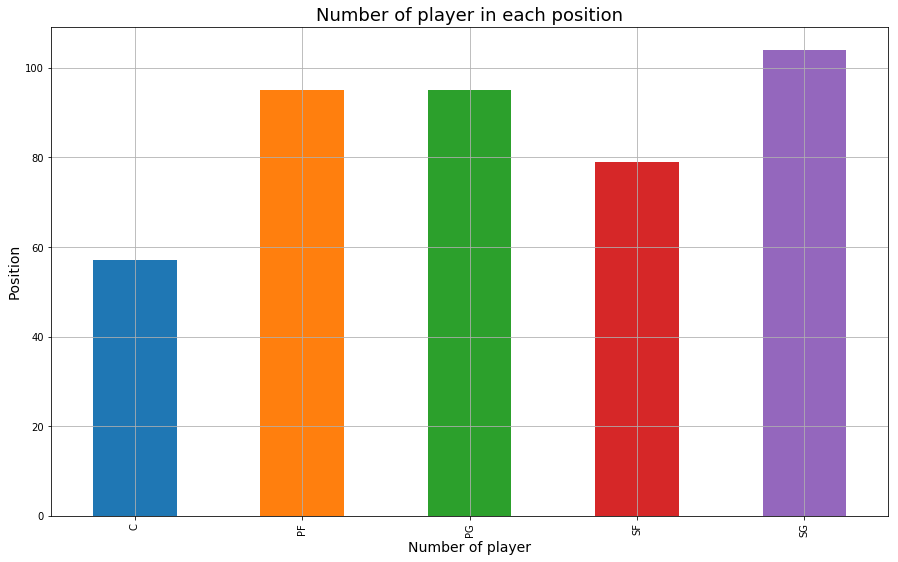

In [24]:
# Visualiztion of the distribution of each position
plt.figure(figsize=(15,9))
nba3.groupby('POSITION')['NAME'].nunique().plot(kind='bar')
plt.title('Number of player in each position', fontsize=18)
plt.xlabel('Number of player', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.grid()
plt.show()

### The amount of each specific position are :
``Point Guard`` : 95 
``Shooting Guard`` : 104 
``Small Forward`` : 79 
``Power Forward`` : 95 
``Center``  : 57

``Total`` : 430

### Generalization of each position average number

In [25]:
nba3.groupby(['POSITION']).mean()

,EXPERIENCE,HT,WT,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON,PPG_CAREER,APG_CAREER,...,GP,MPG,FGP,THP,FTP,APG,BLKPG,STLPG,TOPG,PPG
POSITION,,,,,,,,,,,,,,,,,,,,,
C,5.736842,212.112281,114.328070,9.135470e+06,8.005263,5.763158,0.752632,16.083684,8.029825,5.750877,...,361.456140,18.885965,0.496404,0.144368,0.614632,1.014035,0.892982,0.515789,1.175439,8.029825
PF,4.852632,207.959158,107.177053,7.687056e+06,8.454737,4.511579,0.524211,13.109789,8.293684,4.621053,...,316.031579,19.447368,0.422305,0.257358,0.651632,1.163158,0.564211,0.548421,0.998947,8.293684
PG,4.821053,190.606947,87.307263,8.284069e+06,9.872632,3.501053,2.600000,12.804000,9.162105,3.506316,...,306.315789,20.833684,0.362611,0.277358,0.657432,3.506316,0.200000,0.830526,1.524211,9.162105
SF,4.784810,203.071392,100.367089,8.047415e+06,8.546835,1.474684,3.488608,11.543924,8.406329,1.377215,...,302.620253,20.744304,0.399620,0.298038,0.673089,1.377215,0.377215,0.694937,1.025316,8.406329
SG,4.317308,196.483654,93.382981,6.569353e+06,8.608654,1.738462,2.418269,10.594808,7.903846,1.578846,...,271.288462,18.849038,0.360644,0.298442,0.638740,1.578846,0.210577,0.623077,0.970192,7.903846


### Roughly, we realize that both columns HT and WT is order as : C, PF, SF, SG, PG.  In average, "Center" has the highest height and the heaviest weight, while "Point guard " has the shortest height and the lightest weight.
    
### Below is the illustration of scatter plot, it shows the distribution of height and weight of each position

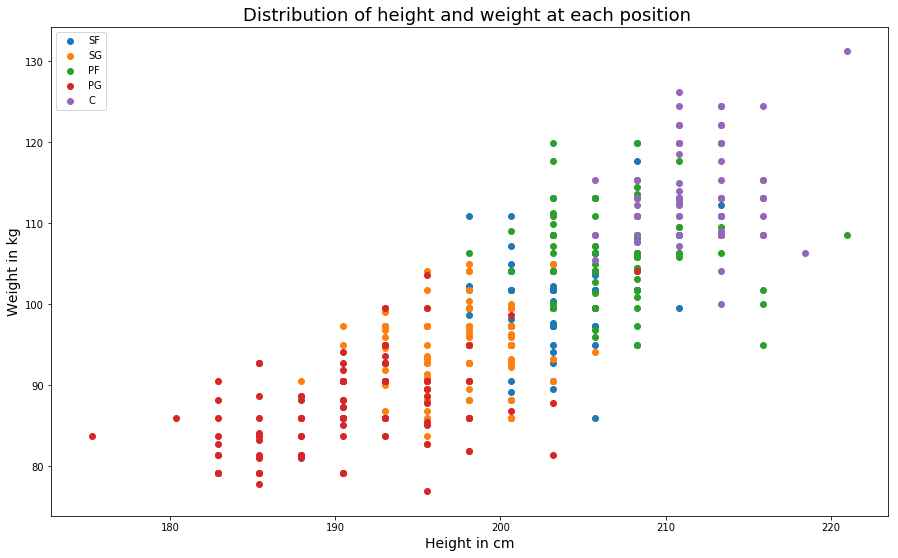

In [26]:
Position = nba3['POSITION'].unique()
plt.figure(figsize=(15,9))
for i in Position[:5]:
    HT = nba3[(nba3['POSITION'] == i)]['HT']
    WT = nba3[(nba3['POSITION'] == i)]['WT']
    plt.scatter(HT, WT)
    plt.title('Distribution of height and weight at each position ', fontsize=18)
    plt.xlabel('Height in cm', fontsize=14)
    plt.ylabel('Weight in kg', fontsize=14)
    plt.legend(Position, loc='upper left')

### Machine learning - Kmeans. I took HT and WT as data, and POSITION as target.

In [27]:
X = nba3[['HT','WT']]
y = nba3[['POSITION']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [29]:
from sklearn.cluster import KMeans            # 1. choose model class
clusters=8
kmeans = KMeans(n_clusters=clusters)          # 2. instantiate model
kmeans.fit(X_train, y_train)                  # 3. fit model to data
y_clusters = kmeans.predict(X_test)           # 4. predict on new data

In [30]:
print(y_clusters)

[6 1 5 6 4 4 2 1 0 0 6 2 5 3 6 3 1 0 3 3 7 1 6 7 0 1 1 3 2 6 5 5 1 3 5 3 3
 7 7 7 0 5 6]


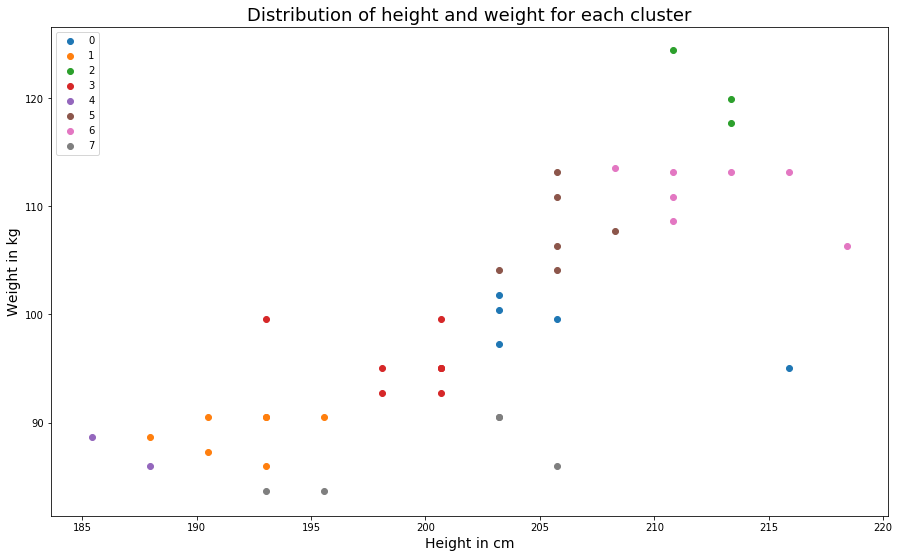

In [31]:
plt.figure(figsize=(15,9))
for i in range(clusters):
    HT = X_test[(y_clusters == i)]['HT']
    WT = X_test[(y_clusters == i)]['WT']
    plt.scatter(HT, WT)
    plt.title('Distribution of height and weight for each cluster', fontsize=18)
    plt.xlabel('Height in cm', fontsize=14)
    plt.ylabel('Weight in kg', fontsize=14)
    plt.legend(range(clusters), loc='upper left')

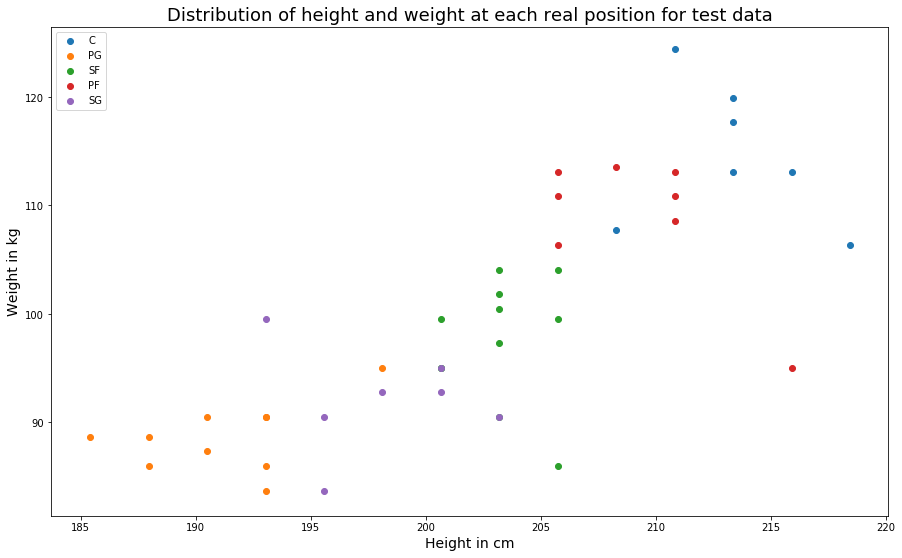

In [32]:
Position = y_test['POSITION'].unique()
plt.figure(figsize=(15,9))
for i in Position[:5]:
    HT = X_test[(y_test['POSITION'] == i)]['HT']
    WT = X_test[(y_test['POSITION'] == i)]['WT']
    plt.scatter(HT, WT)
    plt.title('Distribution of height and weight at each real position for test data', fontsize=18)
    plt.xlabel('Height in cm', fontsize=14)
    plt.ylabel('Weight in kg', fontsize=14)
    plt.legend(Position, loc='upper left')

In [33]:
kmeans.cluster_centers_ # Representative coordinates of each cluster center

array([[205.59346154,  99.24384615],
       [192.09925926,  90.02907407],
       [210.71416667, 120.68125   ],
       [197.28542857,  97.27285714],
       [185.42      ,  82.458     ],
       [204.79774194, 107.04145161],
       [212.20545455, 110.44818182],
       [198.26514286,  86.568     ]])

### Use majority vote to decide the position for each cluster by training data

In [34]:
y_clusters_train = kmeans.predict(X_train)  
y_clusters_train

array([4, 0, 0, 4, 1, 0, 4, 3, 7, 6, 5, 5, 5, 1, 5, 3, 7, 3, 3, 7, 3, 2,
       3, 7, 1, 5, 1, 7, 6, 6, 1, 5, 0, 5, 6, 6, 4, 0, 6, 3, 3, 4, 5, 6,
       3, 4, 4, 6, 5, 3, 7, 1, 5, 7, 6, 3, 0, 3, 3, 3, 6, 5, 5, 4, 5, 3,
       5, 3, 1, 0, 1, 6, 0, 5, 0, 0, 6, 7, 6, 2, 2, 3, 5, 7, 3, 0, 0, 5,
       3, 1, 5, 7, 0, 5, 1, 7, 0, 4, 2, 3, 5, 2, 3, 7, 1, 3, 6, 2, 0, 3,
       6, 1, 1, 1, 0, 5, 5, 1, 0, 0, 3, 6, 5, 0, 7, 0, 4, 4, 0, 6, 4, 0,
       3, 0, 4, 2, 1, 5, 3, 2, 6, 4, 5, 7, 1, 4, 7, 3, 1, 7, 5, 0, 1, 2,
       6, 5, 1, 3, 6, 7, 6, 0, 5, 1, 2, 6, 7, 3, 6, 1, 0, 4, 2, 6, 0, 3,
       0, 7, 0, 6, 1, 6, 7, 0, 5, 3, 3, 2, 5, 1, 5, 3, 6, 3, 3, 3, 6, 3,
       0, 6, 7, 0, 2, 3, 5, 5, 1, 0, 7, 5, 7, 3, 6, 6, 6, 3, 5, 7, 2, 0,
       1, 3, 7, 3, 0, 3, 4, 3, 3, 3, 5, 5, 0, 7, 5, 1, 0, 4, 1, 0, 1, 1,
       6, 5, 6, 5, 5, 5, 3, 6, 7, 1, 4, 0, 1, 2, 5, 1, 4, 5, 5, 2, 3, 3,
       1, 0, 1, 2, 5, 5, 7, 5, 6, 5, 4, 3, 3, 5, 3, 5, 1, 6, 3, 1, 3, 6,
       6, 0, 1, 0, 6, 4, 3, 1, 5, 2, 2, 3, 6, 2, 5,

In [35]:
mapping2= dict([
    ('C' ,0),
    ('PF',1),
    ('SF',2),
    ('SG',3),
    ('PG',4)
])
mapping2_reverse= dict([
    (0,'C'),
    (1,'PF'),
    (2,'SF'),
    (3,'SG'),
    (4,'PG')
])

In [36]:
for c, value in enumerate(y_train['POSITION']):
    print(mapping2[value], value, y_clusters_train[c])

3 SG 4
1 PF 0
2 SF 0
4 PG 4
3 SG 1
2 SF 0
4 PG 4
3 SG 3
3 SG 7
0 C 6
2 SF 5
1 PF 5
1 PF 5
4 PG 1
1 PF 5
3 SG 3
3 SG 7
3 SG 3
2 SF 3
3 SG 7
3 SG 3
0 C 2
3 SG 3
4 PG 7
4 PG 1
2 SF 5
4 PG 1
4 PG 7
1 PF 6
0 C 6
3 SG 1
3 SG 5
1 PF 0
2 SF 5
0 C 6
1 PF 6
4 PG 4
2 SF 0
0 C 6
3 SG 3
2 SF 3
4 PG 4
1 PF 5
0 C 6
3 SG 3
4 PG 4
4 PG 4
0 C 6
1 PF 5
3 SG 3
4 PG 7
3 SG 1
2 SF 5
3 SG 7
1 PF 6
4 PG 3
2 SF 0
3 SG 3
2 SF 3
3 SG 3
0 C 6
2 SF 5
1 PF 5
4 PG 4
1 PF 5
3 SG 3
2 SF 5
2 SF 3
4 PG 1
2 SF 0
4 PG 1
0 C 6
1 PF 0
2 SF 5
1 PF 0
2 SF 0
0 C 6
4 PG 7
1 PF 6
0 C 2
1 PF 2
3 SG 3
1 PF 5
4 PG 7
3 SG 3
2 SF 0
2 SF 0
1 PF 5
3 SG 3
3 SG 1
1 PF 5
4 PG 7
2 SF 0
1 PF 5
4 PG 1
4 PG 7
0 C 0
4 PG 4
0 C 2
3 SG 3
1 PF 5
0 C 2
3 SG 3
2 SF 7
3 SG 1
3 SG 3
1 PF 6
1 PF 2
2 SF 0
3 SG 3
0 C 6
3 SG 1
3 SG 1
4 PG 1
1 PF 0
2 SF 5
3 SG 5
4 PG 1
1 PF 0
2 SF 0
3 SG 3
0 C 6
2 SF 5
2 SF 0
2 SF 7
1 PF 0
4 PG 4
4 PG 4
2 SF 0
1 PF 6
4 PG 4
2 SF 0
4 PG 3
1 PF 0
4 PG 4
2 SF 2
3 SG 1
1 PF 5
3 SG 3
0 C 2
0 C 6
4 PG 4
0 C 5
4 PG 7
3 SG 1
4 PG

In [37]:
# Create 5 * 8 empty matrix
pos = 5
Matrix = [[0 for col in range(clusters)] for row in range(pos)]
Matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [38]:
for c, value in enumerate(y_train['POSITION']):
        Matrix[mapping2[value]][y_clusters_train[c]] = Matrix[mapping2[value]][y_clusters_train[c]]+1     
Matrix

[[1, 0, 17, 0, 0, 3, 29, 0],
 [20, 0, 6, 0, 0, 36, 25, 0],
 [29, 0, 1, 11, 0, 20, 1, 6],
 [2, 22, 0, 53, 3, 2, 0, 15],
 [0, 32, 0, 6, 32, 1, 0, 14]]

In [39]:
top_pos = [0 for x in range(clusters)]
top_count = [0 for x in range(clusters)]
for i in range(clusters):
    for j in range(pos):
        if (Matrix[j][i] > top_count[i]):
            top_count[i] = Matrix[j][i]
            top_pos[i] = j
            
print(top_count)
print(top_pos)

[29, 32, 17, 53, 32, 36, 29, 15]
[2, 4, 0, 3, 4, 1, 0, 3]


In [40]:
y_predict = [mapping2_reverse[top_pos[i]] for i in y_clusters]

In [41]:
compare = y_test['POSITION']== y_predict
accuracy = compare.sum()/len(y_test)
print('accuracy = %2.2f percent' % (100*accuracy))

accuracy = 62.79 percent


### The accuracy of this method is 62.79 percent. We have 62.79 percent of confidence that we can predict a player's position by its height and weight. Hence, we can not precisely predict these day.